# Simple Generative Adversarial Network (GAN) Example with PyTorch
This notebook introduces the basic concept of GANs, a popular class of generative models. It provides a minimal example suitable for beginners, with detailed explanations and code comments.

## What is a GAN?
A Generative Adversarial Network (GAN) consists of two neural networks: a generator and a discriminator. The generator tries to create data that looks real, while the discriminator tries to distinguish between real and fake data. They are trained together in a game-theoretic setup.

Key concepts:
- **Generator**: Produces fake data from random noise.
- **Discriminator**: Tries to tell real data from fake data.
- **Adversarial training**: Both networks improve by competing with each other.

## Minimal Example: 1D GAN
We use a simple 1D example to illustrate the core idea. (For real images, the process is similar but with more complex networks.)

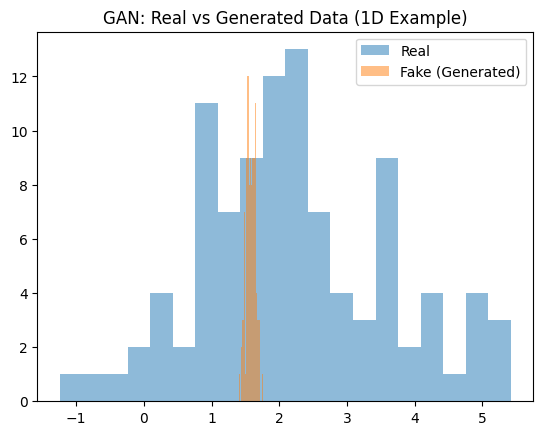

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Real data: samples from a normal distribution
real_data = torch.randn(100, 1) * 1.5 + 2

# Generator: simple linear model
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1)
    def forward(self, z):
        return self.fc(z)

# Discriminator: simple linear model
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1)
    def forward(self, x):
        return torch.sigmoid(self.fc(x))

gen = Generator()
disc = Discriminator()

loss_fn = nn.BCELoss()
gen_opt = optim.Adam(gen.parameters(), lr=0.01)
disc_opt = optim.Adam(disc.parameters(), lr=0.01)

# Training loop (very minimal, for illustration)
for epoch in range(200):
    # Train discriminator
    z = torch.randn(16, 1)
    fake = gen(z)
    real = real_data[torch.randint(0, 100, (16,))]
    disc_loss = loss_fn(disc(real), torch.ones(16, 1)) + \
                loss_fn(disc(fake.detach()), torch.zeros(16, 1))
    disc_opt.zero_grad()
    disc_loss.backward()
    disc_opt.step()
    # Train generator
    fake = gen(z)
    gen_loss = loss_fn(disc(fake), torch.ones(16, 1))
    gen_opt.zero_grad()
    gen_loss.backward()
    gen_opt.step()

# Plot results
z = torch.randn(100, 1)
fake_samples = gen(z).detach().numpy()
plt.hist(real_data.numpy(), bins=20, alpha=0.5, label='Real')
plt.hist(fake_samples, bins=20, alpha=0.5, label='Fake (Generated)')
plt.legend()
plt.title('GAN: Real vs Generated Data (1D Example)')
plt.show()

## Summary
This notebook provides a minimal illustration of the GAN concept. Real GANs for images use deep neural networks, but the core idea is the same: a generator and discriminator compete to improve data generation quality.